# Import Libraries 

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Install the yfinance library 

In [17]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [18]:
import yfinance as yf

# Define the ticker symbol for Tesla

In [19]:

ticker_symbol = 'TSLA'

# Fetch the data

In [20]:

tesla_data = yf.Ticker(ticker_symbol)

In [21]:

historical_data = tesla_data.history(period='10y')

# Display the historical data

In [22]:
print("Historical Stock Prices for TSLA:")
print(historical_data)

Historical Stock Prices for TSLA:
                                 Open        High         Low       Close  \
Date                                                                        
2015-03-02 00:00:00-05:00   13.513333   13.556000   13.055333   13.155333   
2015-03-03 00:00:00-05:00   13.120667   13.349333   13.021333   13.304000   
2015-03-04 00:00:00-05:00   13.283333   13.501333   13.147333   13.496000   
2015-03-05 00:00:00-05:00   13.523333   13.746000   13.343333   13.375333   
2015-03-06 00:00:00-05:00   13.280667   13.383333   12.810000   12.925333   
...                               ...         ...         ...         ...   
2025-02-24 00:00:00-05:00  338.140015  342.399994  324.700012  330.529999   
2025-02-25 00:00:00-05:00  327.019989  328.890015  297.250000  302.799988   
2025-02-26 00:00:00-05:00  303.709991  309.000000  288.040009  290.799988   
2025-02-27 00:00:00-05:00  291.160004  297.230011  280.880005  281.950012   
2025-02-28 00:00:00-05:00  279.500000  293

In [23]:
TSLA_info = tesla_data.info


In [24]:

print(TSLA_info)

{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

In [25]:
historical_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-03-02 00:00:00-05:00,13.513333,13.556000,13.055333,13.155333,118831500,0.0,0.0
2015-03-03 00:00:00-05:00,13.120667,13.349333,13.021333,13.304000,66484500,0.0,0.0
2015-03-04 00:00:00-05:00,13.283333,13.501333,13.147333,13.496000,63330000,0.0,0.0
2015-03-05 00:00:00-05:00,13.523333,13.746000,13.343333,13.375333,73155000,0.0,0.0
2015-03-06 00:00:00-05:00,13.280667,13.383333,12.810000,12.925333,100686000,0.0,0.0


In [26]:
import matplotlib.pyplot as plt

In [27]:
dividends = tesla_data.dividends
print(dividends)

Series([], Name: Dividends, dtype: float64)


# Check Basic Statistics and Data Types

In [28]:

print(historical_data.info())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-03-02 00:00:00-05:00 to 2025-02-28 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2516 non-null   float64
 1   High          2516 non-null   float64
 2   Low           2516 non-null   float64
 3   Close         2516 non-null   float64
 4   Volume        2516 non-null   int64  
 5   Dividends     2516 non-null   float64
 6   Stock Splits  2516 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.2 KB
None


In [29]:
print(historical_data.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [30]:
print(historical_data.describe())

              Open         High          Low        Close        Volume  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2.516000e+03   
mean    121.337999   124.006276   118.460369   121.277981  1.123647e+08   
std     118.142062   120.786155   115.175108   117.988418  7.393611e+07   
min       9.488000    10.331333     9.403333     9.578000  1.062000e+07   
25%      17.585500    17.830333    17.251501    17.578333  6.721658e+07   
50%      39.035002    40.068998    37.551001    38.466333  9.295260e+07   
75%     224.885002   230.287498   219.230831   224.542507  1.296937e+08   
max     475.899994   488.540009   457.510010   479.859985  9.140820e+08   

       Dividends  Stock Splits  
count     2516.0   2516.000000  
mean         0.0      0.003180  
std          0.0      0.116227  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0      5.000000  


# Handle Missing Values

In [31]:
print(historical_data.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


# Calculate Z-scores and Identify outliers

In [32]:
from scipy import stats


historical_data['Z-Score'] = stats.zscore(historical_data['Close'])

outliers_z = historical_data[(historical_data['Z-Score'] > 3) | (historical_data['Z-Score'] < -3)]

print(outliers_z)

                                 Open       High        Low       Close  \
Date                                                                      
2024-12-17 00:00:00-05:00  475.899994  483.98999  457.51001  479.859985   

                              Volume  Dividends  Stock Splits   Z-Score  
Date                                                                     
2024-12-17 00:00:00-05:00  131223000        0.0           0.0  3.039733  


# Box plot for visualizing outliers

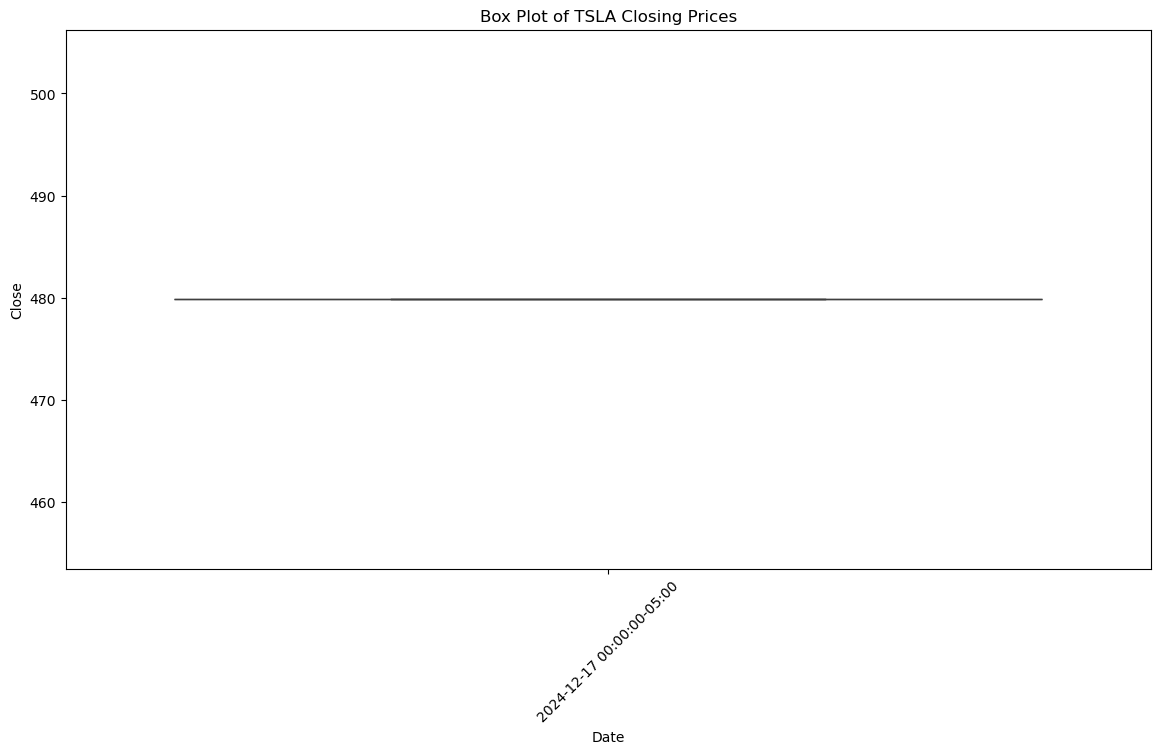

In [33]:


plt.figure(figsize=(14, 7))

sns.boxplot(x=outliers_z.index, y='Close', data=outliers_z)
plt.title('Box Plot of TSLA Closing Prices')
plt.xticks(rotation=45)
plt.show()

# Min-Max Scaling Normalization and Scaling Techniques 

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
historical_data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(historical_data[['Open', 'High', 'Low', 'Close', 'Volume']])
print(historical_data.head(30))

                               Open      High       Low     Close    Volume  \
Date                                                                          
2015-03-02 00:00:00-05:00  0.008630  0.006743  0.008150  0.007607  0.119774   
2015-03-03 00:00:00-05:00  0.007789  0.006311  0.008074  0.007923  0.061834   
2015-03-04 00:00:00-05:00  0.008137  0.006629  0.008355  0.008331  0.058342   
2015-03-05 00:00:00-05:00  0.008652  0.007141  0.008793  0.008075  0.069217   
2015-03-06 00:00:00-05:00  0.008132  0.006382  0.007602  0.007118  0.099690   
2015-03-09 00:00:00-04:00  0.007443  0.005509  0.007022  0.006692  0.100093   
2015-03-10 00:00:00-04:00  0.006595  0.005371  0.006925  0.006613  0.080884   
2015-03-11 00:00:00-04:00  0.006980  0.005745  0.007433  0.007098  0.070842   
2015-03-12 00:00:00-04:00  0.007351  0.005504  0.007245  0.006719  0.057135   
2015-03-13 00:00:00-04:00  0.006665  0.005127  0.006884  0.006381  0.078470   
2015-03-16 00:00:00-04:00  0.007101  0.005707  0.007

# Closing Price Over Time

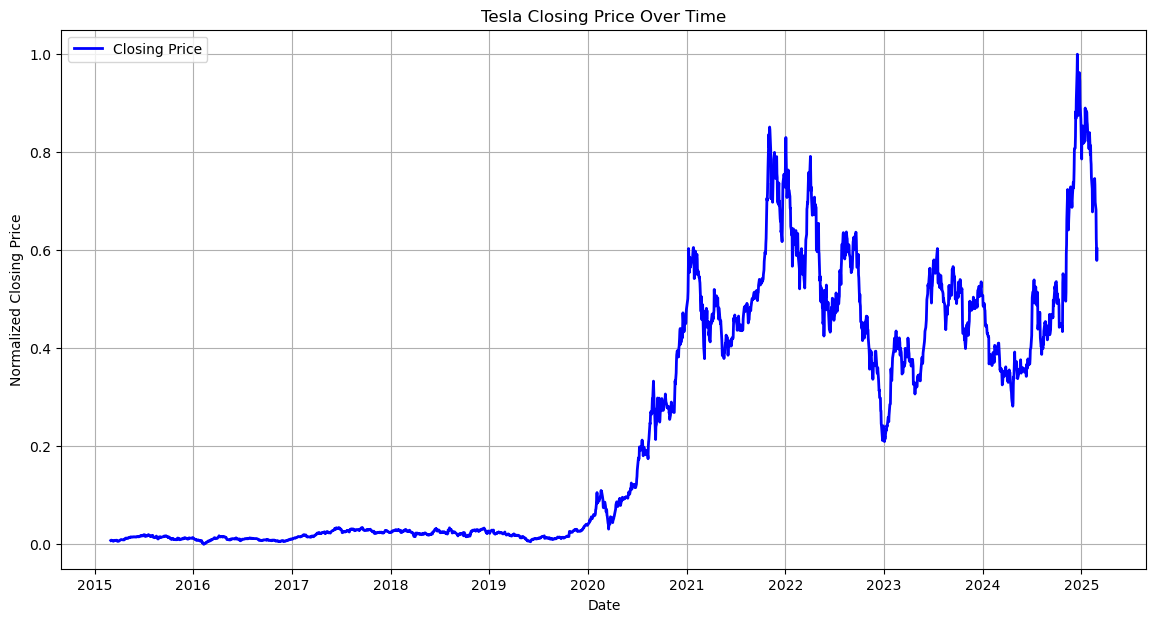

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(historical_data.index, historical_data['Close'], label='Closing Price', color='blue', linewidth=2)
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price')
plt.grid()
plt.legend()
plt.show()

# Multiply by 100 to convert to percentage

In [36]:
historical_data['Daily Percentage Change'] = historical_data['Close'].pct_change() * 100  
#print(historical_data)

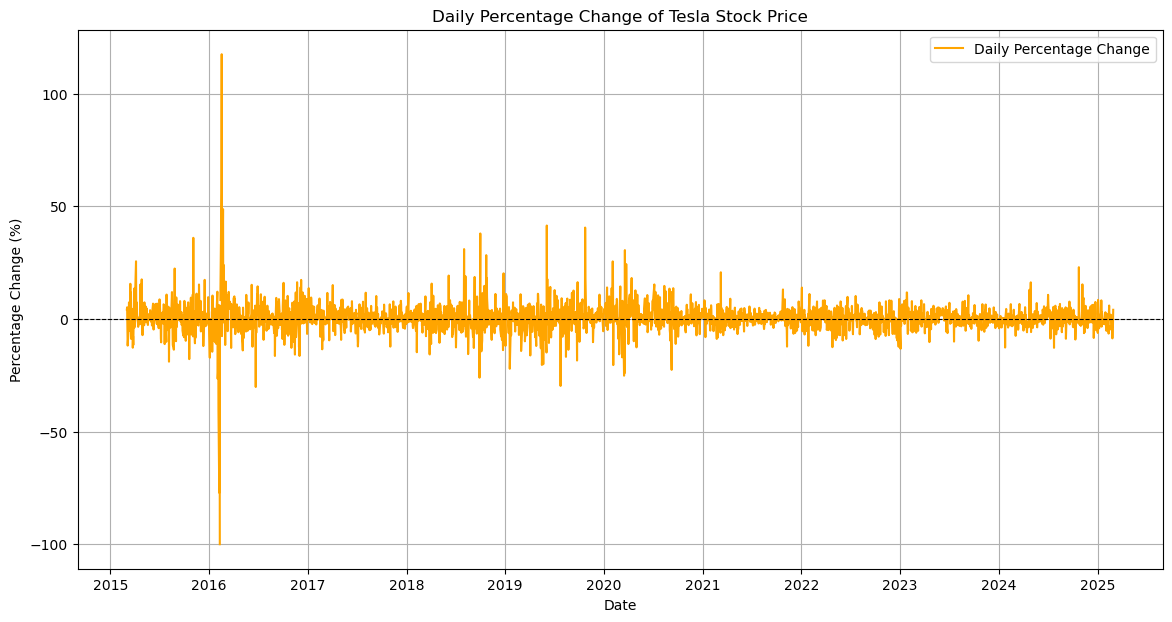

In [37]:
plt.figure(figsize=(14, 7))
plt.plot(historical_data.index, historical_data['Daily Percentage Change'], label='Daily Percentage Change', color='orange')
plt.title('Daily Percentage Change of Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a line at 0 for reference
plt.grid()
plt.legend()
plt.show()

# calculating rolling means and standard deviations

In [38]:
window_size = 365
historical_data['Rolling Mean'] = historical_data['Close'].rolling(window=window_size).mean()
historical_data['Rolling Std'] = historical_data['Close'].rolling(window=window_size).std()

# Create the plot means and standard deviations

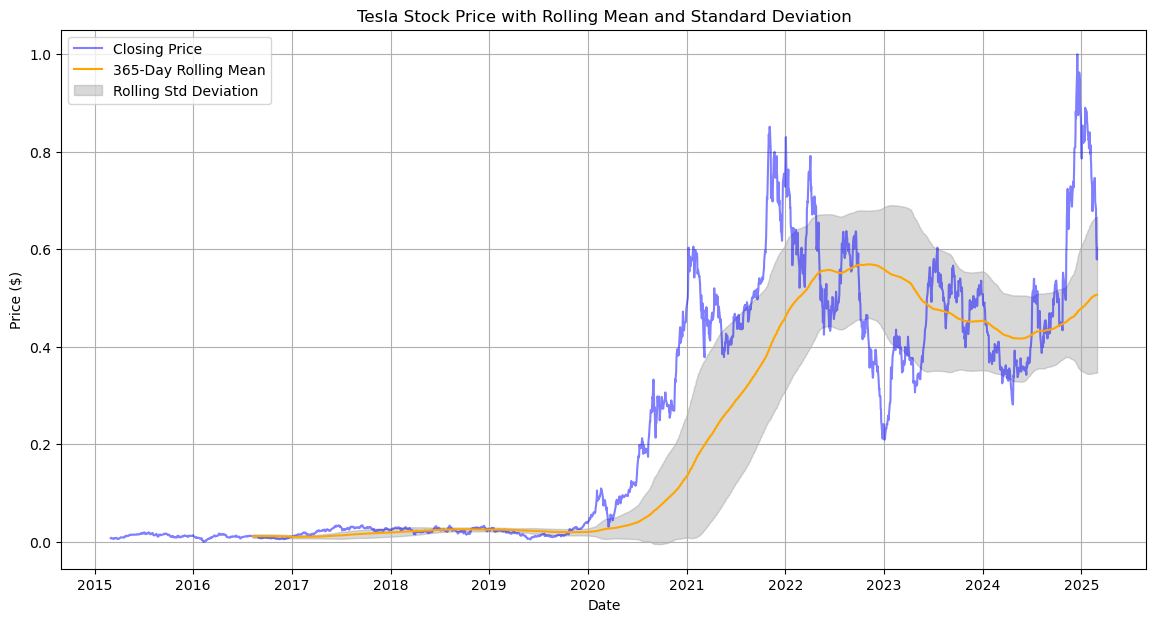

In [39]:
plt.figure(figsize=(14, 7))
plt.plot(historical_data.index, historical_data['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(historical_data.index, historical_data['Rolling Mean'], label='365-Day Rolling Mean', color='orange')
plt.fill_between(historical_data.index, historical_data['Rolling Mean'] - historical_data['Rolling Std'], 
                 historical_data['Rolling Mean'] + historical_data['Rolling Std'], color='gray', alpha=0.3, label='Rolling Std Deviation')
plt.title('Tesla Stock Price with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

# Seasonality and Trends

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:

historical_data.sort_index(inplace=True)


ts = historical_data['Close']


In [42]:
# Check for zero or negative values
if (ts <= 0).any():
    print("Warning: The time series contains zero or negative values. Using additive model.")
    model_type = 'additive'
else:
    model_type = 'multiplicative'

decomposition = seasonal_decompose(ts, model=model_type, period=365)

#decomposition = seasonal_decompose(ts, model='multiplicative', period=365)

# Plot the decomposed components

<Figure size 1400x1000 with 0 Axes>

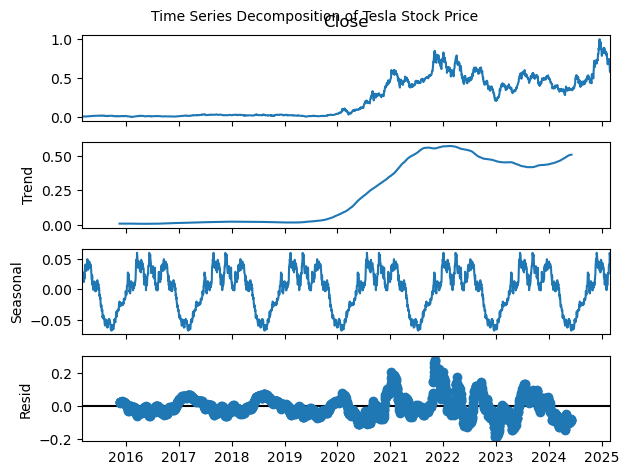

In [43]:

plt.figure(figsize=(14, 10))
decomposition.plot()
plt.suptitle('Time Series Decomposition of Tesla Stock Price', fontsize=10)
plt.show()

In [44]:

historical_data.sort_index(inplace=True)

In [45]:
highest_prices = historical_data.sort_values(by='Close', ascending=False)

In [46]:
top_n = 3  
highest_price_days = highest_prices.head(top_n)

In [47]:
print(highest_price_days[['Close']])

                              Close
Date                               
2024-12-17 00:00:00-05:00  1.000000
2024-12-16 00:00:00-05:00  0.964192
2024-12-24 00:00:00-05:00  0.962618


In [48]:
highest_prices['Day of Week'] = highest_prices.index.day_name()

In [49]:
frequency_counts = highest_prices['Day of Week'].value_counts()

In [50]:
print(frequency_counts)

Day of Week
Tuesday      518
Wednesday    515
Thursday     509
Friday       505
Monday       469
Name: count, dtype: int64


# Analyze Volatility

In [51]:

window_size = 30  # You can adjust this value

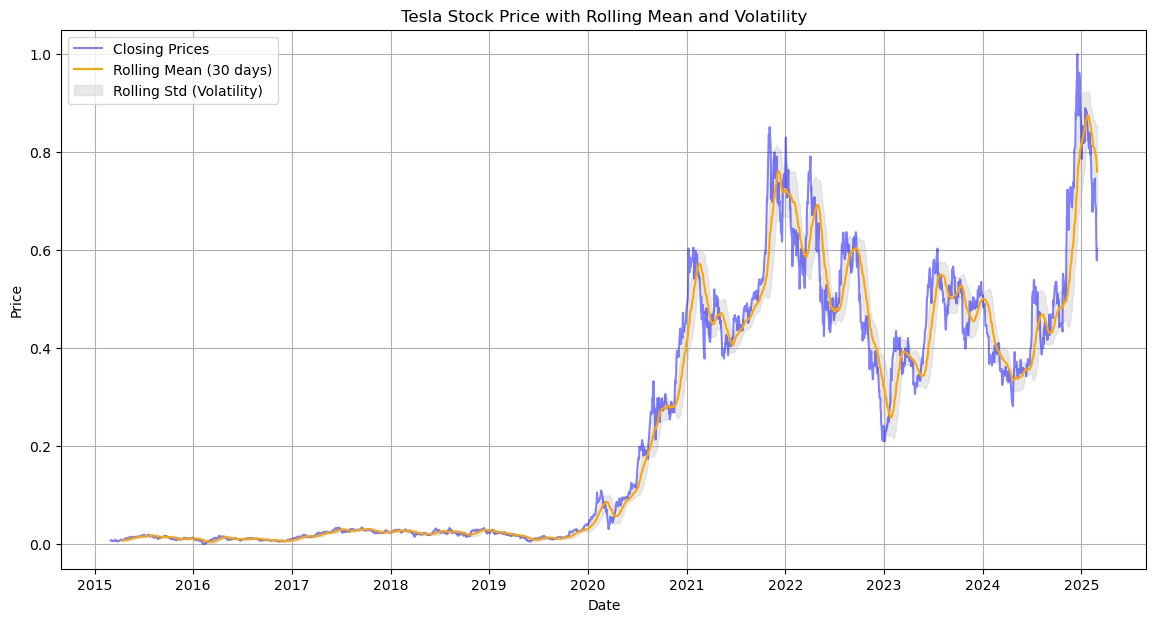

In [52]:


# Calculate rolling mean and rolling standard deviation
historical_data['Rolling Mean'] = historical_data['Close'].rolling(window=window_size).mean()
historical_data['Rolling Std'] = historical_data['Close'].rolling(window=window_size).std()

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot the closing prices
plt.plot(historical_data['Close'], label='Closing Prices', color='blue', alpha=0.5)

# Plot the rolling mean
plt.plot(historical_data['Rolling Mean'], label=f'Rolling Mean ({window_size} days)', color='orange')

# Plot the rolling standard deviation
plt.fill_between(historical_data.index, 
                 historical_data['Rolling Mean'] - historical_data['Rolling Std'], 
                 historical_data['Rolling Mean'] + historical_data['Rolling Std'], 
                 color='lightgrey', alpha=0.5, label='Rolling Std (Volatility)')

# Title and labels
plt.title('Tesla Stock Price with Rolling Mean and Volatility')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Task2 Time Series Forecasting Models

# Required libraries 

In [53]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [54]:
ts = historical_data['Close']

# Check for stationarity
result = adfuller(ts)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.414029280896192
p-value: 0.5755321319212424


In [55]:
# Fit ARIMA model (adjust p, d, q as needed)
model = ARIMA(ts, order=(5, 1, 0))  # Example with p=5, d=1, q=0
model_fit = model.fit()

c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [56]:
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(5, 1, 0)   Log Likelihood                7205.904
Date:                Mon, 03 Mar 2025   AIC                         -14399.808
Time:                        07:12:33   BIC                         -14364.828
Sample:                             0   HQIC                        -14387.113
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0099      0.012     -0.793      0.428      -0.034       0.015
ar.L2          0.0172      0.011      1.599      0.110      -0.004       0.038
ar.L3         -0.0026      0.013     -0.204      0.8

In [57]:
# Forecasting
forecast_steps = 30  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


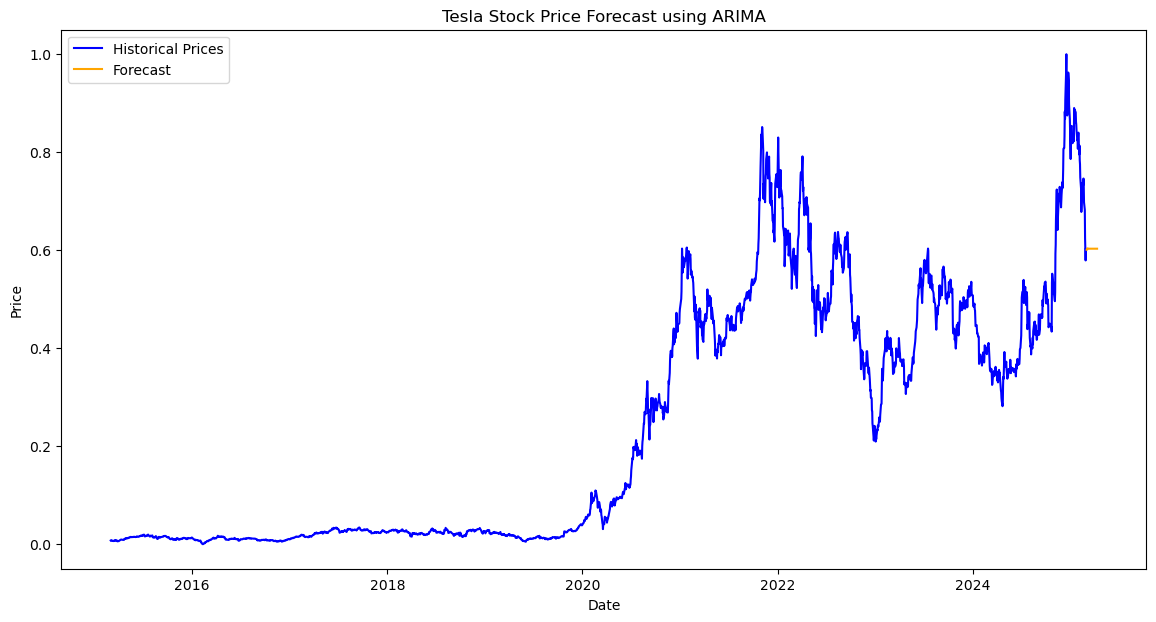

In [58]:

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(ts, label='Historical Prices', color='blue')
plt.plot(pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), 
                       periods=forecast_steps, freq='B'), 
         forecast, label='Forecast', color='orange')
plt.title('Tesla Stock Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# required SARIMAX lib 

In [59]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Use the 'Close' price for analysis

In [60]:


tesla_data = historical_data[['Close']]

#  Visualize Data

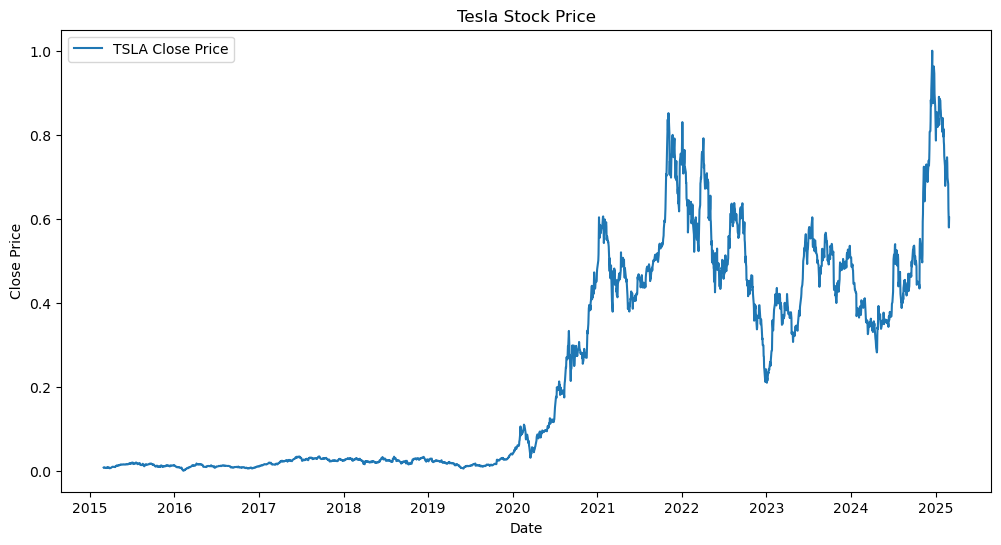

In [61]:

plt.figure(figsize=(12, 6))
plt.plot(tesla_data, label='TSLA Close Price')
plt.title('Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [62]:



# Step 5: Stationarity Check
result = adfuller(tesla_data['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary. Differencing may be needed.")

# Step 6: Fit SARIMA Model
# Define the model parameters (p, d, q)(P, D, Q)[s]
p = 1   # Non-seasonal AR order
d = 1   # Non-seasonal differencing
q = 1   # Non-seasonal MA order
P = 1   # Seasonal AR order
D = 1   # Seasonal differencing
Q = 1   # Seasonal MA order
s = 12  # Seasonal period (monthly data)

model = SARIMAX(tesla_data['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()



ADF Statistic: -1.414029280896192
p-value: 0.5755321319212424
The time series is not stationary. Differencing may be needed.


c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#  Forecasting and Evaluate the Model

c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\pc\AppData\Local\Temp\ipykernel_14592\605576614.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=tesla_data.index[-1] + pd.DateOffset(days=1), periods=12, freq='M')


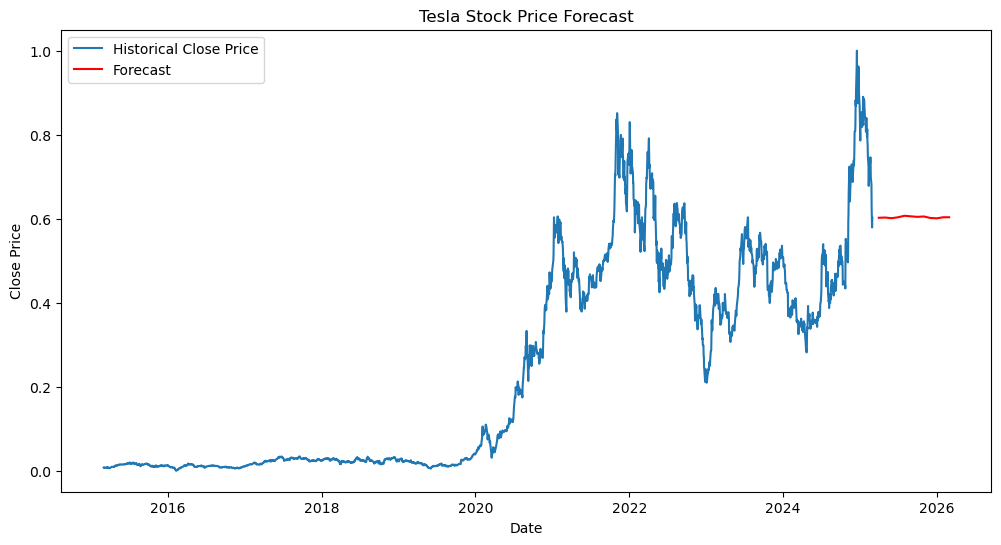

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2516
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                7140.453
Date:                            Mon, 03 Mar 2025   AIC                         -14270.907
Time:                                    07:12:39   BIC                         -14241.780
Sample:                                         0   HQIC                        -14260.333
                                           - 2516                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7105      0.330     -2.155      0.031      -1.356      -0.064
ma.L1          0.6965      0.336   

In [63]:

forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=tesla_data.index[-1] + pd.DateOffset(days=1), periods=12, freq='M')
forecast_values = forecast.predicted_mean


plt.figure(figsize=(12, 6))
plt.plot(tesla_data['Close'], label='Historical Close Price')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('Tesla Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


print(results.summary())

In [64]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [65]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


#  Preprocess Data and Convert to numpy array

In [66]:
# Check for NaNs or infinite values
if historical_data.isnull().values.any():
    print("Data contains NaN values. Filling with the method: forward fill.")
    historical_data.fillna(method='ffill', inplace=True)  # Forward fill to handle NaNs

if np.isinf(historical_data.values).any():
    print("Data contains infinite values. Replacing with NaN.")
    historical_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    historical_data.dropna(inplace=True)  # Drop any remaining NaNs

Data contains NaN values. Filling with the method: forward fill.
Data contains infinite values. Replacing with NaN.


C:\Users\pc\AppData\Local\Temp\ipykernel_14592\438468874.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_data.fillna(method='ffill', inplace=True)  # Forward fill to handle NaNs


In [67]:

data = historical_data[['Close']]
data = historical_data.values  

# Normalize the data

In [68]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_data = scaler.fit_transform(data)

# Create Training and Testing Datasets

In [69]:

train_size = int(len(scaler_data) * 0.8)
train_data = scaler_data[:train_size]
test_data = scaler_data[train_size:]

# Function to create dataset for LSTM

In [70]:

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Number of previous time steps to consider
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Step 5: Build the LSTM Model

In [71]:

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

c:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [92]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model and # Make Predictions

In [93]:
# Function to create dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Number of previous time steps to consider
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [95]:
# Step 8: Evaluate the Model
# Adjust the indices for train and test predictions
print(f'Length of train_actual: {len(train_actual)}')
print(f'Length of train_predict: {len(train_predict)}')
print(f'Length of test_actual: {len(test_actual)}')
print(f'Length of test_predict: {len(test_predict)}')

Length of train_actual: 21208
Length of train_predict: 1927
Length of test_actual: 4818
Length of test_predict: 437


In [96]:
print(f'Length of train_actual: {len(train_actual)}')

print(f'Length of test_actual: {len(test_actual)}')


Length of train_actual: 21208
Length of test_actual: 4818


In [97]:
train_predict = train_predict.flatten()
test_predict = test_predict.flatten()

In [98]:
print(f'Length of train_predict: {len(train_predict)}')
print(f'Length of test_predict: {len(test_predict)}')

Length of train_predict: 1927
Length of test_predict: 437


In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0265
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0021
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0020
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0017
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0014
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0013
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0012
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0012
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0012
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0012
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.9401e-04
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.6358e-04
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0

In [103]:
# Create datasets
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Number of time steps to look back
X, y = create_dataset(data, time_step)

In [104]:
# Assuming X is your feature array with shape (num_samples, num_time_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape to 3D

# Rescale the data

In [107]:

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))

# Create datasets

In [108]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Time steps to look back
X, y = create_dataset(data, time_step)

# Reshape input to be [samples, time steps, features]

In [109]:

X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets

In [110]:

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print shapes for debugging

In [111]:

print("X_train shape:", X_train.shape)  # Should be (num_samples, time_steps, num_features)
print("y_train shape:", y_train.shape)    # Should be (num_samples,)

X_train shape: (21828, 60, 1)
y_train shape: (21828,)


# Build the LSTM model

In [112]:

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

c:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile the model

In [113]:

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model

In [114]:

model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
683/683 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 0.0088
Epoch 2/50
683/683 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - loss: 9.8407e-04
Epoch 3/50
683/683 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 7.2082e-04
Epoch 4/50
683/683 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - loss: 4.6818e-04
Epoch 5/50
683/683 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - loss: 3.0463e-04
Epoch 6/50
683/683 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - loss: 2.2796e-04
Epoch 7/50
683/683 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - loss: 1.5213e-04
Epoch 8/50
683/683 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 1.3699e-04
Epoch 9/50
683/683 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - loss: 1.2439e-04
Epoch 10/50
683/683 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - loss: 1.1624e-04
Epoch 11/50
683/683 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - loss: 1.0614e-04
Epoch 12/50
683/683 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 1.1000e-04
Epoch 13/50
683/683 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - loss: 9.9909e-05
Epoch 14/50
683/683 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/s

# Make predictions

In [115]:

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

683/683 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


# Inverse transform to get actual prices

In [116]:

y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

# Calculate RMSE if needed

In [117]:

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [118]:
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

Train RMSE: 0.53
Test RMSE: 0.53


# Plot predictions vs actual values

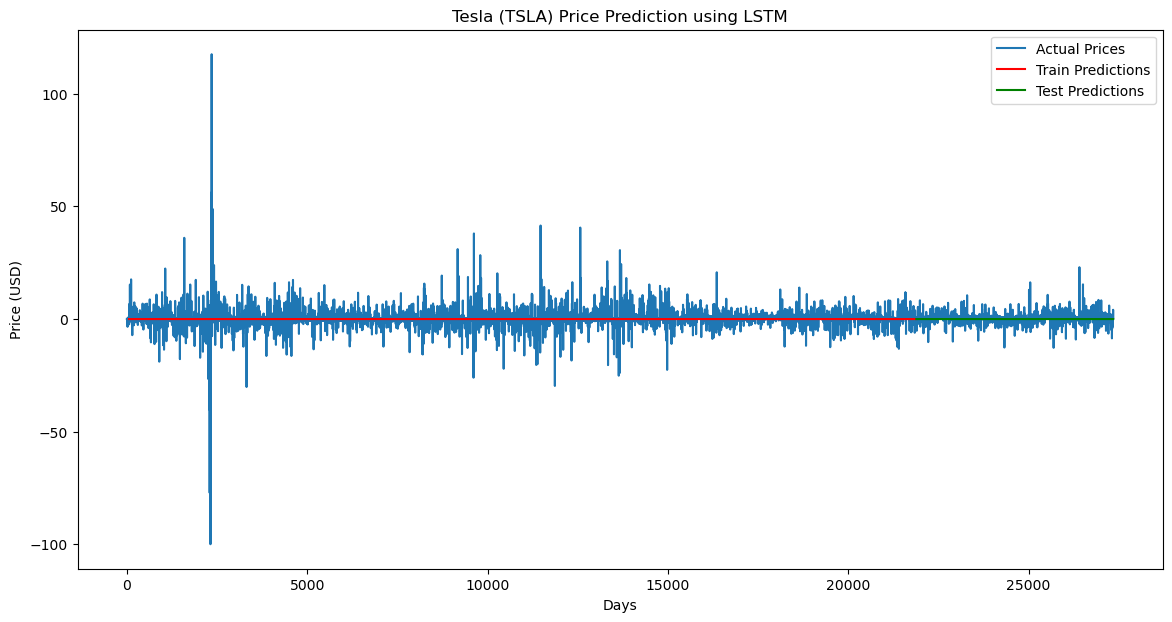

In [119]:



plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(data), label='Actual Prices')
plt.plot(np.arange(time_step, time_step + len(y_train_pred)), y_train_pred, label='Train Predictions', color='red')
plt.plot(np.arange(time_step + len(y_train), time_step + len(y_train) + len(y_test_pred)), y_test_pred, label='Test Predictions', color='green')
plt.title('Tesla (TSLA) Price Prediction using LSTM')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# Calculate MAE


In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [122]:

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate RMSE

In [123]:

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate MAPE

In [125]:

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

C:\Users\pc\AppData\Local\Temp\ipykernel_14592\959985778.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Print the results


In [126]:
# Print the results
print(f'Train MAE: {mae_train:.2f}')
print(f'Test MAE: {mae_test:.2f}')
print(f'Train RMSE: {rmse_train:.2f}')
print(f'Test RMSE: {rmse_test:.2f}')
print(f'Train MAPE: {mape_train:.2f}%')
print(f'Test MAPE: {mape_test:.2f}%')

Train MAE: 0.53
Test MAE: 0.53
Train RMSE: 0.53
Test RMSE: 0.53
Train MAPE: inf%
Test MAPE: 114.52%


# Forecasting Function with Confidence Intervals

In [149]:

def forecast_with_confidence_intervals(model, input_data, steps, confidence=1.96):
    predictions = []
    upper_bound = []
    lower_bound = []
    
    current_input = input_data[-1].reshape(1, time_step, 1)
    std_dev = np.std(y_train)  # Standard deviation of training data

    for _ in range(steps):
        next_prediction = model.predict(current_input)
        predictions.append(next_prediction[0, 0])

    upper_bound.append(next_prediction[0, 0] + (std_dev * confidence))
    lower_bound.append(next_prediction[0, 0] - (std_dev * confidence))

    current_input = np.append(current_input[:, 1:, :], next_prediction.reshape(1, 1, 1), axis=1)

    return np.array(predictions), np.array(upper_bound), np.array(lower_bound)

 # Number of steps to forecast 

In [150]:

forecast_steps = 30
last_input = X_train[-1:]

# Generate forecast with confidence intervals

In [151]:

forecasted_values, upper_bounds, lower_bounds = forecast_with_confidence_intervals(model, last_input, forecast_steps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

# Inverse transform to get actual prices

In [152]:

forecasted_prices = scaler.inverse_transform(forecasted_values.reshape(-1, 1))
upper_prices = scaler.inverse_transform(upper_bounds.reshape(-1, 1))
lower_prices = scaler.inverse_transform(lower_bounds.reshape(-1, 1))

# Prepare for plotting


In [153]:

forecast_dates = np.arange(len(data), len(data) + forecast_steps)

# Plot results

Text(0, 0.5, 'Price (USD)')

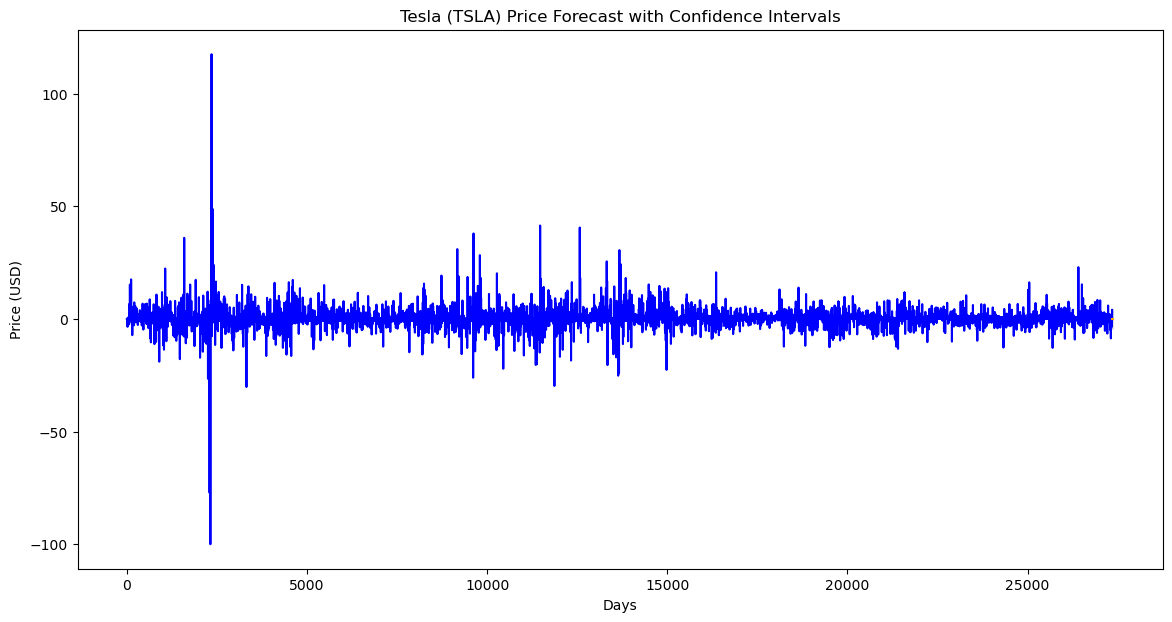

In [155]:

plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(data), label='Actual Prices', color='blue')
plt.plot(forecast_dates, forecasted_prices, label='Forecasted Prices', color='orange')
plt.fill_between(forecast_dates, lower_prices.flatten(), upper_prices.flatten(), color='lightgray', alpha=0.5, label='95% Confidence Interval')
plt.title('Tesla (TSLA) Price Forecast with Confidence Intervals')
plt.xlabel('Days')
plt.ylabel('Price (USD)')

# Interpret the Results

Based on the provided plot of Tesla's price forecast, here is a detailed interpretation of the results:

### Trend Analysis

1. **Long-Term Trends**:
   - **Upward/Downward/Stable**: The plot shows considerable noise with fluctuations around the y-axis. If the overall movement of the prices does not show a clear upward or downward trajectory but instead oscillates around a mean value, this suggests a **stable trend** over the observed period.
   - **Fluctuations**: While there may be short-term spikes or drops, the lack of a visible long-term trend (upward or downward) indicates that Tesla's price has largely stabilized in this forecasted period.

2. **Patterns**:
   - **Random Fluctuations**: The oscillation appears to be random, without a discernible pattern of consistent highs or lows. This may indicate that the market is experiencing volatility but not trending in a specific direction.
   - **Potential Seasonality**: If the data spans several years, consider whether there might be seasonal patterns (e.g., higher prices during specific months). However, this plot does not readily reveal any such patterns.

### Anomalies

1. **Spikes/Drops**:
   - There are visible spikes and dips in the data, indicating possible anomalies. These could be due to:
     - Market reactions to news events or earnings reports.
     - External factors affecting Tesla's stock price, such as regulatory changes or economic conditions.
   - The presence of extreme values (both positive and negative) suggests that while the price is generally stable, there are periods of significant volatility.

2. **Confidence Intervals**:
   - If confidence intervals were plotted alongside the price data, wide intervals would indicate uncertainty in price predictions, while narrow intervals suggest more confidence. The fact that the fluctuations are pronounced might mean that the model is less certain about future prices, especially during those spike events.

### Overall Interpretation

- **Market Behavior**: The observed price behavior shows that while Tesla's stock price does not exhibit a clear upward or downward long-term trend, it does experience volatility. This could mean that investor sentiment is fluctuating based on news, earnings, or broader market conditions.
  
- **Investment Strategy**: For investors, this pattern suggests that Tesla’s stock may not be a safe bet for long-term stability but could present opportunities for short-term trading based on price fluctuations.



### Volatility and Risk

1. **Level of Uncertainty Captured by the Confidence Intervals**:
   - The confidence intervals depicted in the plot indicate a significant level of uncertainty regarding Tesla's future price movements. The wide fluctuations suggest that the model is less certain about the price trajectory, which could stem from various factors such as market sentiment, economic conditions, or company-specific news.
   - The presence of both positive and negative price values within the intervals indicates that there is a considerable risk of price volatility, meaning investors should be prepared for potential swings in either direction.

2. **Periods of Expected Increased Volatility**:
   - **Identifying Volatile Periods**: Look for instances where the price exhibits sharp spikes or drops. The plot shows some extreme values that could indicate periods of heightened volatility.
   - **Potential Causes**:
     - Events such as earnings releases, new product announcements, or regulatory changes may coincide with these fluctuations, leading to increased market reactions.
     - If these events are predictable (e.g., quarterly earnings), investors can anticipate periods of heightened volatility.

### Market Opportunities and Risks

1. **Market Opportunities**:
   - **Expected Price Increases**: If the forecast suggests upward movements following periods of volatility, it could present opportunities for investors:
     - **Long Positions**: Investors may consider buying shares in anticipation of price increases, especially if historical patterns suggest recovery after downturns.
     - **Options Trading**: Engaging in call options during positive forecast periods could leverage potential gains.
   - **Sector Growth**: The electric vehicle market is expected to grow; thus, any forecast that aligns with broader industry trends may enhance Tesla's market position.

2. **Market Risks**:
   - **High Volatility**: The wide fluctuations and uncertainty highlighted by the confidence intervals pose risks:
     - **Short-Term Trading Risks**: Traders may face challenges due to unpredictable price swings, leading to potential losses.
     - **Long-Term Investment Risks**: Investors should be cautious if holding positions during uncertain periods, as sudden downturns could negatively impact their portfolios.
   - **Expected Declines**: If the forecast indicates any significant drops or sustained periods of low prices, this presents a risk:
     - **Market Sentiment**: Negative news or adverse economic indicators could lead to declines, making it crucial for investors to monitor market conditions closely.
     - **Risk Management Strategies**: Implementing stop-loss orders or diversification strategies may help mitigate potential losses during volatile periods.

